<a href="https://colab.research.google.com/github/asdas6da6sd/practicas/blob/master/Transformada_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
path ='/content/drive/My Drive/prodim/'
os.chdir(path)
!pwd
%matplotlib inline

/content/drive/My Drive/prodim


In [0]:
def displayGray2(a, b,title1 = "Original", title2 = "Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

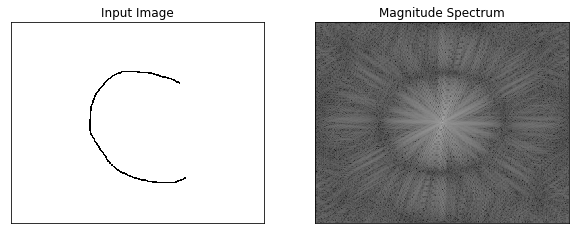

In [55]:
img = cv2.imread('c.png',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
displayGray2(img,magnitude_spectrum,"Input Image", "Magnitude Spectrum")

In [0]:
def display3(a, b,c,title1 = "Original", title2 = "Edited", title3 = "Edited"):
    plt.figure(figsize=(20,20))
    plt.subplot(131), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(c,cmap='gray'), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [0]:
def display4(a, b,c,d,title1 = "Original", title2 = "Edited", title3 = "Edited", title4 = "Edited"):
    plt.figure(figsize=(20,20))
    plt.subplot(141), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(142), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(143), plt.imshow(c,cmap='gray'), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.subplot(144), plt.imshow(d,cmap='gray'), plt.title(title4)
    plt.xticks([]), plt.yticks([])
    plt.show()

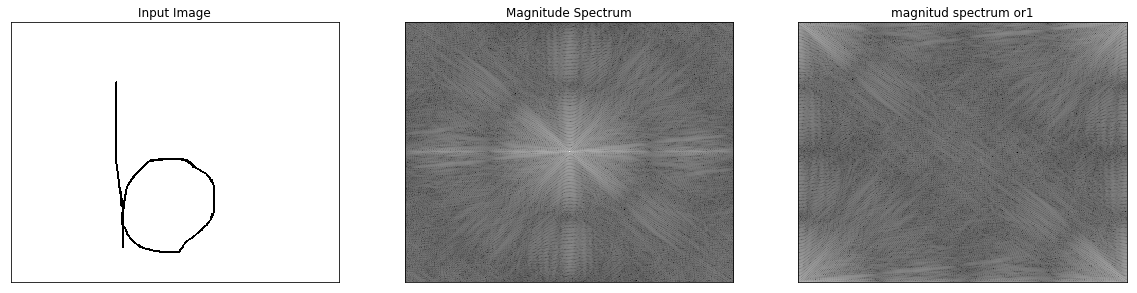

In [44]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitud_spectrum_c = 20*np.log(np.abs(fshift))
magnitud_spectrum_or1 = 20*np.log(np.abs(f))
display3(img,magnitud_spectrum_c,magnitud_spectrum_or1,"Input Image", "Magnitude Spectrum","magnitud spectrum or1")

**FILTRO PASA BAJAS**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


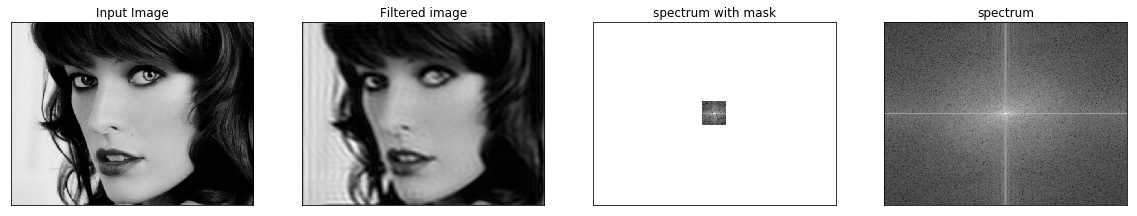

In [72]:

img = cv2.imread('resid.png',0)
img_flotante = np.float32(img)
dft = cv2.dft(img_flotante,flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
fils,cols = img.shape
centfils,centcols = fils/2,cols/2

##crear mascara centro en unos resto en ceros

mask= np.zeros((fils,cols,2),np.uint8)
mask[np.int32(centfils)-30 : np.int32(centfils)+30,np.int32(centcols)-30 : np.int32(centcols)+30]=1

##aplicar mascara y obtener inversa 

fshift = dft_shift*mask
fshift_mask_mag = 20*np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

display4(img,img_back,fshift_mask_mag,magnitude_spectrum,"Input Image", "Filtered image","spectrum with mask","spectrum")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


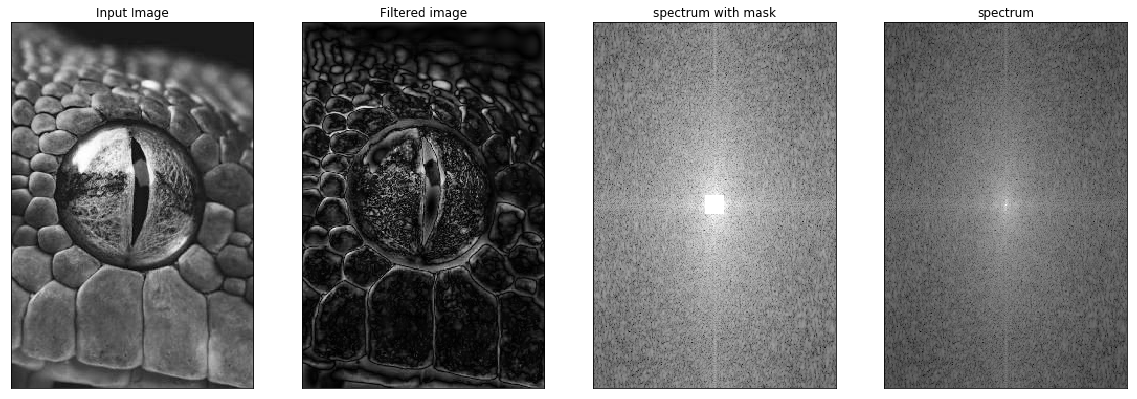

In [83]:
img = cv2.imread('ojo.jpg',0)
img_flotante = np.float32(img)
dft = cv2.dft(img_flotante,flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
fils,cols = img.shape
centfils,centcols = fils/2,cols/2

##crear mascara centro en unos resto en ceros

mask= np.ones((fils,cols,2),np.uint8)
mask[np.int32(centfils)-9 : np.int32(centfils)+9,np.int32(centcols)-9 : np.int32(centcols)+9]=0

##aplicar mascara y obtener inversa 

fshift = dft_shift*mask
fshift_mask_mag = 20*np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

display4(img,img_back,fshift_mask_mag,magnitude_spectrum,"Input Image", "Filtered image","spectrum with mask","spectrum")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


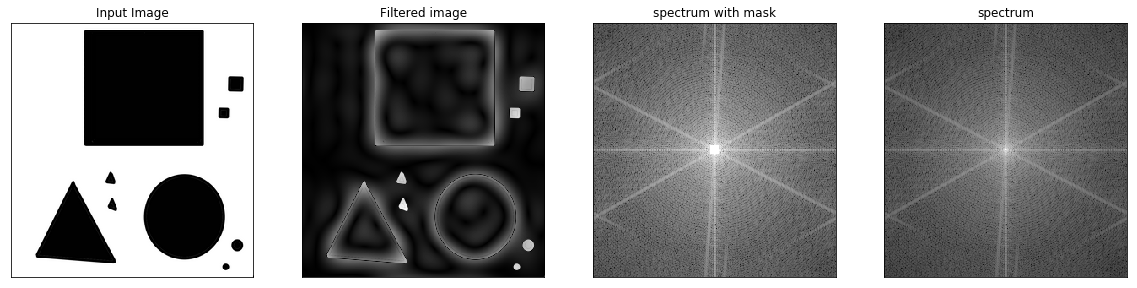

In [77]:
img = cv2.imread('figuras.png',0)
img_flotante = np.float32(img)
dft = cv2.dft(img_flotante,flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
fils,cols = img.shape
centfils,centcols = fils/2,cols/2

##crear mascara centro en unos resto en ceros

mask= np.ones((fils,cols,2),np.uint8)
mask[np.int32(centfils)-5 : np.int32(centfils)+5,np.int32(centcols)-5 : np.int32(centcols)+5]=0

##aplicar mascara y obtener inversa 

fshift = dft_shift*mask
fshift_mask_mag = 20*np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

display4(img,img_back,fshift_mask_mag,magnitude_spectrum,"Input Image", "Filtered image","spectrum with mask","spectrum")